In [1]:
import os
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# define function to a window size N and output consequetive True

#  run it along a test dataset and see what N works - try for different size across the 8 test cases we have

In [2]:
# read the files that we have manual annotations for 

manuallist = glob.glob('../dataFolders/ManuallyAnnotatedVideos/' + '*.mp4')
names = []
for m in manuallist:
    n = os.path.basename(m)
    names.append(n)
    
uniquenames = [n for n in names if "first" in n]

moths = []
for bla in uniquenames:
    n = bla.split('_')[0] + '_' + bla.split('_')[1]
    moths.append(n)

In [ ]:
# find the same files in the automated pipeline

In [148]:
fileloc = '../dataFolders/PaperPipelineOutput/RawTracks/'

files = glob.glob(fileloc + '*/*.csv')

finallist = []
for m in moths:
    f = [f for f in files if m in f]
    finallist.extend(f)    

In [4]:
def find_consecutive(array, win_size):
    l = []
    count = 0
    for index, item in enumerate(test):
        if item:
            count = count + 1
        else:
            count = 0
#         print(index, count)
        if count == win_size:
            our_index = index - win_size + 1 
            l.append(our_index)
    return l    

In [46]:
def window(size, sequence):
    win = np.array([1]*size)
    slider = segment * win
    if sum(slider) == size:
        return 1
    else:
        return 0

In [13]:
sum(np.array([1, 1, 0]) * np.array([1, 1, 1]) )

2

In [91]:
# try it on a made up array

n = 3
test = np.zeros(11)
test = [False] * 11
test[2:5] = [True, True, True, True]
test[7:10] = [True, True, True, True]
test


[False,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 False]

In [92]:
win_size = n
array = test
find_consecutive(test,n)

[2, 7]

In [109]:
# def slidingWindow(x, n):
#     l = []
#     for index,_ in enumerate(x):
#         print(index)
#         if index > len(x)-n:
#             break
#         segment = x[index:index + n]
#         print(segment)
#         print(n)
#         ans = []
#         ans = window(n, np.array(segment))
#         print(ans)
#         l.append(ans)
#     return(l)

In [111]:
slidingWindow(test, 3)

0
[False, False, True]
3
0
1
[False, True, True]
3
0
2
[True, True, True]
3
0
3
[True, True, True]
3
0
4
[True, True, False]
3
0
5
[True, False, True]
3
0
6
[False, True, True]
3
0
7
[True, True, True]
3
0
8
[True, True, True]
3
0
9
[True, True, False]
3
0
10
[True, False, False]
3
0
11


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# start reading x y coordinates to find chuncks of true values 

In [152]:
# invisble boundary = 5
# any x y coordinates less than 5 to be replaced by NaN

# f = [ff for ff in f if "c-1_m11" in ff]
# f
f = finallist[0]
readfile = pd.read_csv(f)
print(os.path.basename(f))

c-10_m11_visit_0.csv


In [64]:
x = readfile.loc[:,'x'].copy()
y = readfile.loc[:, 'y'].copy()

In [65]:
print(x[x<=5].count())
print(y[y<=5].count())

655
658


(260, 280)

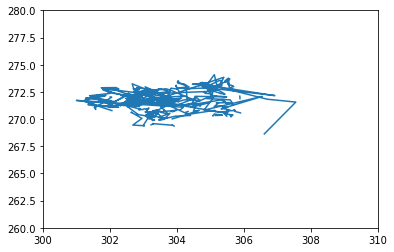

In [123]:
x[x<=5] = np.nan
y[y<=5] = np.nan

plt.plot(x, y)
plt.xlim(300,310)
plt.ylim(260,280)

In [67]:
bla = np.isfinite(x).values
bla

array([ True,  True,  True, ...,  True,  True,  True])

In [76]:
convert_bla = np.zeros_like(bla)
# convert_bla[bla == False] = 0
convert_bla[bla == True] = 1
convert_bla

array([ True,  True,  True, ...,  True,  True,  True])

In [82]:
x_true = find_consecutive(bla, 6)
x_true
# y_true = find_consecutive(y, win_size=4)

[]

In [116]:
n = 8
l = []
for index,_ in enumerate(convert_bla):
#     print(index)
    if index > len(convert_bla)-n:
        break
    segment = convert_bla[index:index + n]
#     print(segment)
    ans = window(n, np.array(segment))
    l.append(ans)

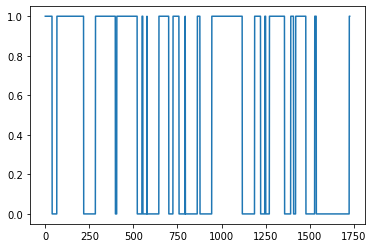

In [117]:
plt.plot(l)